# Auto text complete Project

#### A) N-gram description:
An n-gram is a sequence of n items (numbers, characters, words) from some source. For example, the phrase “scoo be do be do be” contains the word-based 2-grams “scoo be” (once), “be do” (twice), and “do be” (twice). N-grams are used by computational linguists, biologists, and data compression experts in a multitude of ways. They can be especially useful in prediction models, where you have the start of a sequence of items and want to predict what is next—for example, when you text on your phone it might predict what word you want next as a shortcut.

#### B) Project description:
1-Write a Python script that asks the user for:
- a value of n (of n-gram length)
- a minimum n-gram frequency

2-tracks the frequency of n-grams values from the input text. 
- reporting the results for the n-grams values and their frequency
- plot the n-gram values top 10 frequencies 

3-create an auto text complete function:
- ask the user to try the auto text complete function
- allow the user to repeatedly enter a group of n words
- report back the top three most likely words to show up after input and thier precentage


#### C) User Input description:
the script promtpts te user the following messeges 
- please enter an n-gram length
- please enter the Minimum n-gram frequency
- would you like to try the text auto complete function
- please enter n words
- would you like to try the text auto complete function again.

#### D) Script Output description:
the script returns the following:
- n-gram values and frequencies table
- top 10 n-gram values and frequencies plot
- the top 3 most likely words and thier frequency for user input

**Note**
input text is a book sourced from this roylty free website https://www.gutenberg.org for analysis.

### code breakdown:
-  section 1: importing all relevent libraries
-  section 2: read and clean text input
- section 3: convert text into a list
- section 4: ask user for input
- section 5: word counter based on the N-gram input value
- section 6: orgnize and filter the words counts
- section 7: plot the top 10 frequencies
- section 8: return the auto complete function results

##### section 1: importing all relevent libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### section 2: read and clean text input
- open file containing input text
- read file content up to 100k set limit (can be increased)
- remove all line break charachters in the file
- store all non-empty lines into a varible
- count the number of lines

In [6]:
with open('book.txt')as book:
    paragraphText=''
    counter= 1 # raw data line counter
    counter_stored= 1 # stored non empty lines lines
    while counter < 100000: # loop over a max of 100k line book or at the end of the txt
        line= None
        line =  book.readline()
        #read line and add line into a string variable
        #line break are removed
        if line == '':
            break
        line= line.replace('\n',' ')+' '
        if line != '':
        #empty lines are not added
            #print(counter,line)
            paragraphText += line # add line text
        else:
            None
            #print('X',line) # ommit empty line
        counter+=1
#print(paragraphText)

##### section 3: convert text into a list
- remove symbols from text
- convert every word into a list element
- store non empty words

In [62]:
#turn every word in paragraphText into an element in paragraphList list
#lower case and clean every elery word in the list

stripCharachters= ['(',')',':' ,'?','.',',','@','"',"'",'#','{','}','[',']','_','-','—','*','!','$','^',"/", "\\",'<','>','”', '“']

for char in stripCharachters:
    paragraphText = paragraphText.replace(char," ")

rawParagraphList= paragraphText.split()

paragraphList=[]
for word in rawParagraphList:    
    for char in stripCharachters:
        word = word.replace(char,'')

    if word != '':
        paragraphList.append(word)

##### section 4: ask user for input
- ask user for N-gram value in int
- ask user for minimum frequency
- ask user to input word(s) to test the auto complete text function
- each input has an error message for invalid input, and a function that re-ask the qustion again

In [63]:
while True:
    try:
        n=int(input('input the value of N to calculate the N-gram '))
        break
    except Exception as e:
        print(e)
        print('please enter a number')

while True:
    try:
        count =int(input('input the minimum count of a word '))
        break
    except Exception as e:
        print(e)
        print('please enter a number')
        
while True:
    try:
        autoCompleteInput =str(input('please input a {} word sentence'.format(n-1)))
        if len(autoCompleteInput.split()) == n-1:
            break
        else:
            raise Exception('number of words doesn\'t the required number')
    except Exception as e:
        print(e)
        print('please enter a number')

input the value of N to calculate the N-gram 
invalid literal for int() with base 10: ''
please enter a number
input the value of N to calculate the N-gram 
invalid literal for int() with base 10: ''
please enter a number
input the value of N to calculate the N-gram 
invalid literal for int() with base 10: ''
please enter a number
input the value of N to calculate the N-gram 3
input the minimum count of a word 25
please input a 2 word sentenceis the


##### section 5: word counter based on the N-gram input value
- iterate over every element of the list except the last n-1 element* (parent loop)
- for every word (wordIndex) add the next n words (child loop)
- remove any extra spaces or characters
- if the word sequence exisit in (gramCountDict) dictionary increase its count by 1
- if the word sequence doesnt exisit in (gramCountDict) dictionary set its count to 1 
       
       
       
**Note * explanition:** for an N-gram value of 2 each 2-gram requires adding 2 consequtive words from the list of words;
   However, the last element will not find another element to add to;
   thus, adding the element before the last with the last element and stoping at the (last index - (n-1) )

In [64]:
gramCountDict= {}

for wordIndex in range(len(paragraphList)-(n-1)):
    gram= ''
    for word in range(n):
        gram+= paragraphList[wordIndex+(word)]+ ' '
    gram= gram.strip()
    if gram in gramCountDict.keys():
        gramCountDict[gram]+=1
    else:
        gramCountDict[gram]=1


##### section 6: orgnize and filter the words counts
- create a table that holds all the data
- sort the data by frequency in descending order
- filter the data to show only frequencies the user has specified

In [65]:
GramKeys = np.array(list(gramCountDict.keys()))
GramFrequency= np.array(list(gramCountDict.values()))
df=  pd.DataFrame(data= {'values':GramKeys, 'frequency':GramFrequency})
df.sort_values(by=['frequency'.format(n)] , ascending=False, inplace=True)
dfCount= df[df['frequency'] >= count]

##### section 7: plot the top 10 frequencies

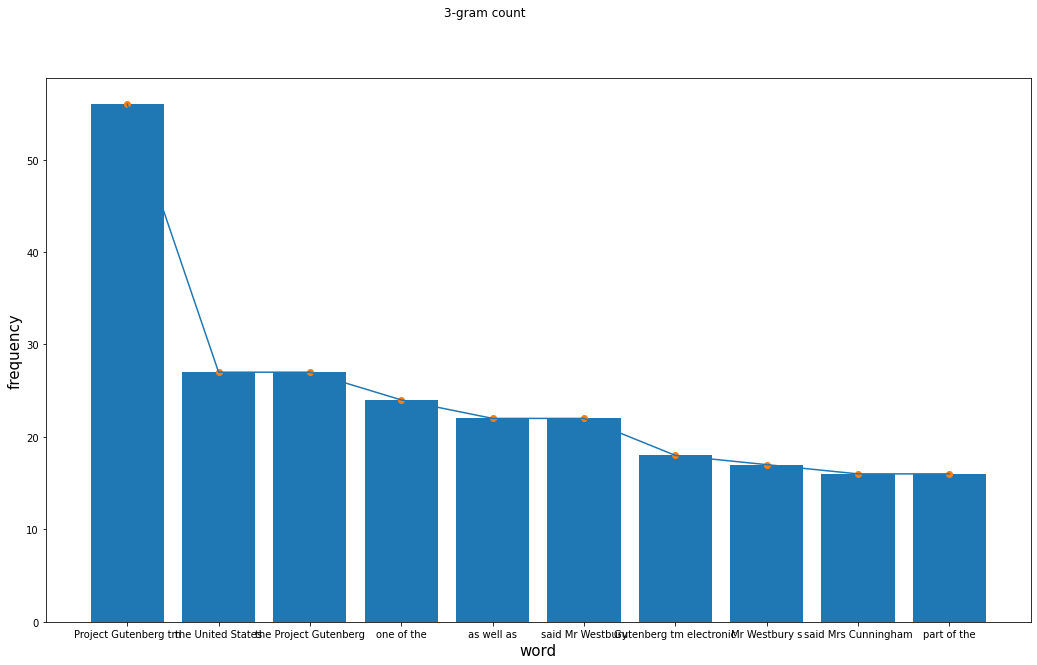

In [66]:
plt.figure(figsize= (60,10))
plt.subplot(132)
plt.bar(df['values'].head(10), df['frequency'].head(10))
plt.subplot(132)
plt.scatter(df['values'].head(10), df['frequency'].head(10))
plt.subplot(132)
plt.plot(df['values'].head(10), df['frequency'].head(10))
plt.suptitle('{}-gram count'.format(n))
plt.xlabel('word',fontsize= 15)
plt.ylabel('frequency', fontsize= 15)
plt.show()

##### section 8: return the auto complete function results
- return the word sequences matching the user input
- calculate the presentages of these values
- return a table with all the possible word sequence predictions and their precentages
- create a plot for visulization

In [72]:
topValues = df[df['values'].str[:len(autoCompleteInput)] == autoCompleteInput]
frequencyList=  topValues['frequency']
totalFrequency = sum(frequencyList)
precentageList = (frequencyList/totalFrequency)*100

In [73]:
dfP = pd.DataFrame(data= {'Values': topValues['values'], 'precentageList': precentageList}).head(10)
dfP

,Values,precentageList
54615,is the established,3.1250
2729,is the question,3.1250
21786,is the matter,3.1250
1465,is the most,3.1250
1561,is the nature,3.1250
44461,is the cause,1.5625
43930,is the very,1.5625
42429,is their true,1.5625
43082,is the accompaniment,1.5625
42742,is the education,1.5625


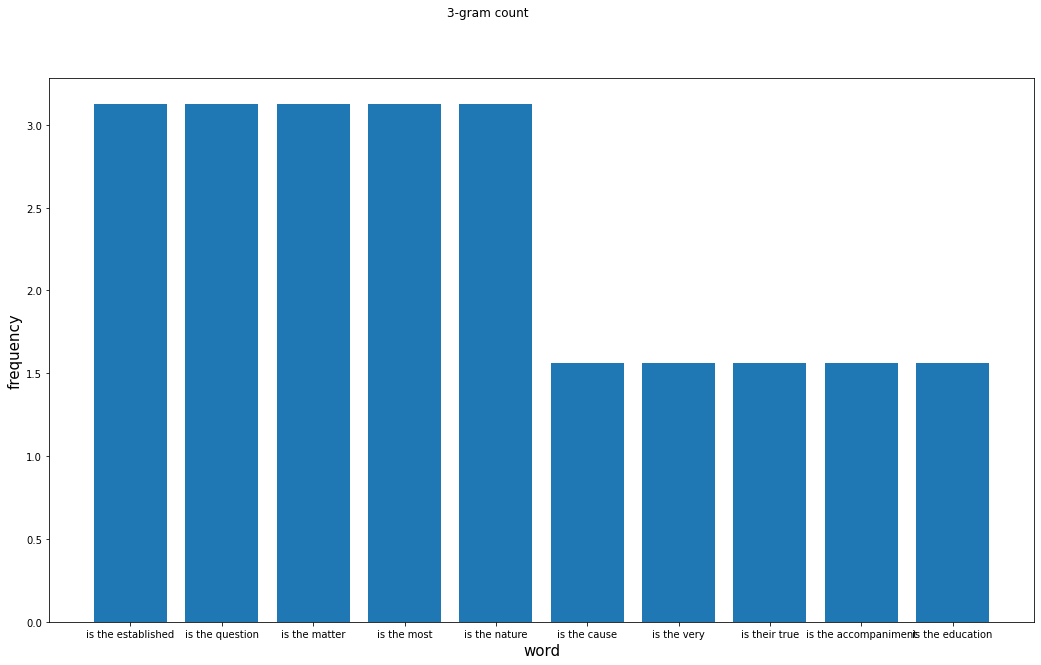

In [74]:
plt.figure(figsize= (60,10))

plt.subplot(132)
plt.bar(dfP['Values'],dfP['precentageList'])

plt.suptitle('{}-gram count'.format(n))
plt.xlabel('word',fontsize= 15)
plt.ylabel('frequency', fontsize= 15)
plt.show()